In [1]:
import wikipedia
import json
from bs4 import BeautifulSoup 
import requests
import re
import random
import ast
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sys import maxsize

In [2]:
INT_MAX = maxsize

### Philosophy

In [3]:
list_phil = ["https://en.wikipedia.org/w/index.php?title=Special%3AWhatLinksHere&target=Greek&namespace=0",
         "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Existence&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Reason&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Knowledge&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Value_(ethics)&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Mind&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Language&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Pythagoras&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Philosophical_methodology&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Questioning&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Philosopher&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Ancient_Greek&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Aristotle&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Natural_philosophy&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Astronomy&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Medicine&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Physics&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Newton&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Philosophi%C3%A6_Naturalis_Principia_Mathematica&namespace=0&limit=50",
        "https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Research_university&namespace=0&limit=50"]
len(list_phil)

20

In [4]:
philosophy = {}
for item in list_phil:
    url = item
    data  = requests.get(url).text 
    soup = BeautifulSoup(data,"html5lib")
    name = soup.find('title')
    name = name.string
    start= '"'
    end = '"'
    title= (name.split(start))[1].split(end)[0]
    articlelinks = []
    paras = soup.find_all('ul',{"id": "mw-whatlinkshere-list"})
    for para in paras:
        links = para.find_all('a')
        for link in links:
            data = re.findall('href="/wiki/', str(link))
            if len(data)!=0:
                x = re.findall("\[*\]", str(link.string))
                if len(x)==0:
                    articlelinks.append(link.string)
    philosophy[title]=articlelinks
philosophy
    

{'Greek': ['Ancient Greek',
  'Greece (disambiguation)',
  'The Greek',
  'Hellenic',
  'Greco (surname)',
  'Outline of Greece',
  'Grković',
  'Greeks (disambiguation)',
  'Macedonian Greeks (disambiguation)',
  'Damb'],
 'Existence': ['Aristotle',
  'Altruism',
  'Arthur Schopenhauer',
  'Aikido',
  'Anti-realism',
  'Axiology',
  'Baruch Spinoza',
  'Being',
  'Bertrand Russell',
  'Category of being',
  'Copula (linguistics)',
  'Consciousness',
  'Cultural movement',
  'Charles Sanders Peirce',
  'Cosmological argument',
  'Cogito, ergo sum',
  'Convention (norm)',
  'Existence',
  'Existentialism',
  'E-Prime',
  'Friedrich Nietzsche',
  'Foundationalism',
  'Fundamentalism',
  'Faith healing',
  'George Berkeley',
  'G. E. Moore',
  'Gottfried Wilhelm Leibniz',
  'Gilles Deleuze',
  'Georg Wilhelm Friedrich Hegel',
  'Henri Bergson',
  'Isaac Newton',
  'Immanuel Kant',
  'Idealism',
  'John Locke',
  'Jean-Paul Sartre',
  'Karma',
  'Ludwig Wittgenstein',
  'Metaphysics',
  'S

In [5]:
matrix1 = [[0 for x in range(20)] for x in range(20)]
for i in range(20):
    for j in range(20):
        matrix1[i][j] = 0

In [6]:
matrix = [[0 for x in range(20)] for x in range(20)]
for i in range(20):
    for j in range(20):
        matrix[i][j] = 1000


In [7]:
philosophy_list = list(philosophy)
#count=0
j=0
k=0
#l=0
for x in range(20):
    for y in range(20):
        #print("\niteration")
        #print(x)
        #print("j=")
        #print(x)
        #print(" k=")
        #print(y)
        list1=philosophy[philosophy_list[x]]
        list2=philosophy[philosophy_list[y]]
        #print(list1)
        #print(list2)
        a=len(list1)
        b=len(list2)
        count=0
        for m in range(a):
            l=0
            for n in range(b):
                #print(count)
                if(list2[n]==list1[m]):
                    #print(list2[n]+ "\t" +list1[m])
                    count+=1
                    #print(count)
        #print(count)
        if(count>5):
            matrix[x][y]=count
            matrix1[x][y]=count
            print(philosophy_list[x] + " and " + philosophy_list[y])
            #print(x)
            #print(y)
            #print("\n")
#print(matrix)
print(matrix1)

Greek and Greek
Existence and Existence
Existence and Reason
Existence and Knowledge
Existence and Value (ethics)
Existence and Mind
Existence and Philosopher
Existence and Natural philosophy
Reason and Existence
Reason and Reason
Reason and Knowledge
Reason and Value (ethics)
Reason and Mind
Reason and Philosopher
Reason and Natural philosophy
Knowledge and Existence
Knowledge and Reason
Knowledge and Knowledge
Knowledge and Value (ethics)
Knowledge and Mind
Knowledge and Language
Knowledge and Natural philosophy
Value (ethics) and Existence
Value (ethics) and Reason
Value (ethics) and Knowledge
Value (ethics) and Value (ethics)
Value (ethics) and Mind
Value (ethics) and Philosopher
Value (ethics) and Natural philosophy
Mind and Existence
Mind and Reason
Mind and Knowledge
Mind and Value (ethics)
Mind and Mind
Mind and Language
Mind and Philosopher
Mind and Natural philosophy
Language and Knowledge
Language and Mind
Language and Language
Pythagoras and Pythagoras
Pythagoras and Ancien

0   Greek
1   Existence
2   Reason
3   Knowledge
4   Value (ethics)
5   Mind
6   Language
7   Pythagoras
8   Philosophical methodology
9   Questioning
10   Philosopher
11   Ancient Greek
12   Aristotle
13   Natural philosophy
14   Astronomy
15   Medicine
16   Physics
17   Newton
18   Philosophiæ Naturalis Principia Mathematica
19   Research university


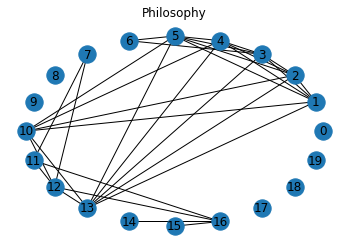

In [8]:
for index,article in enumerate(philosophy_list):
    print(index," ",article)
df = pd.DataFrame(data=matrix1)
plt.figure()
plt.title("Philosophy")
G = nx.OrderedGraph(df.values)
nx.draw_circular(G, with_labels=True)


In [9]:
for i,j in philosophy.items():
    print(i)

Greek
Existence
Reason
Knowledge
Value (ethics)
Mind
Language
Pythagoras
Philosophical methodology
Questioning
Philosopher
Ancient Greek
Aristotle
Natural philosophy
Astronomy
Medicine
Physics
Newton
Philosophiæ Naturalis Principia Mathematica
Research university


In [10]:
tree = [[0 for x in range(20)] for x in range(20)]
for i in range(20):
    for j in range(20):
        tree[i][j] = 0

In [11]:

from sys import maxsize
INT_MAX = maxsize
V = 20
def isValidEdge(u, v, inMST):
    if u == v:
        return False
    if inMST[u] == False and inMST[v] == False:
        return False
    elif inMST[u] == True and inMST[v] == True:
        return False
    return True
 
def primMST(cost):
    inMST = [False] * V
    inMST[0] = True
    edge_count = 0
    mincost = 0
    while edge_count < V - 1:
 
        # Find minimum weight valid edge.
        minn = INT_MAX
        a = -1
        b = -1
        for i in range(V):
            for j in range(V):
                if cost[i][j] < minn:
                    if isValidEdge(i, j, inMST):
                        minn = cost[i][j]
                        a = i
                        b = j
 
        if a != -1 and b != -1:
            print("Edge %d: (%d, %d) cost: %d" %
                 (edge_count, a, b, minn))
            tree[a][b]=minn
            edge_count += 1
            mincost += minn
            inMST[b] = inMST[a] = True
 
    print("Minimum cost = %d" % mincost)

if __name__ == "__main__":

    primMST(matrix)
# sanjeev2552

Edge 0: (0, 1) cost: 1000
Edge 1: (1, 10) cost: 7
Edge 2: (2, 10) cost: 6
Edge 3: (10, 13) cost: 6
Edge 4: (5, 13) cost: 6
Edge 5: (5, 6) cost: 6
Edge 6: (3, 6) cost: 6
Edge 7: (12, 13) cost: 6
Edge 8: (2, 4) cost: 7
Edge 9: (12, 16) cost: 8
Edge 10: (11, 16) cost: 6
Edge 11: (15, 16) cost: 7
Edge 12: (14, 16) cost: 10
Edge 13: (7, 11) cost: 11
Edge 14: (0, 8) cost: 1000
Edge 15: (0, 9) cost: 1000
Edge 16: (0, 17) cost: 1000
Edge 17: (0, 18) cost: 1000
Edge 18: (0, 19) cost: 1000
Minimum cost = 6092


In [12]:
print(tree)

[[0, 1000, 0, 0, 0, 0, 0, 0, 1000, 1000, 0, 0, 0, 0, 0, 0, 0, 1000, 1000, 1000], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

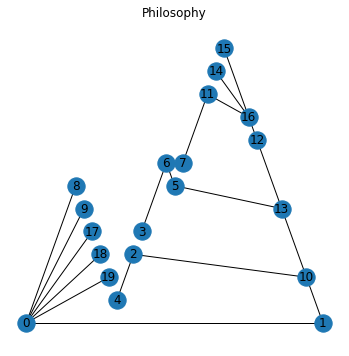

In [14]:
df1 = pd.DataFrame(data=tree)
f=plt.figure(figsize=(6,6))
plt.title("Philosophy")
G1 = nx.OrderedGraph(df1.values)
nx.draw_planar(G1, with_labels=True)